In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

data = pd.read_csv("HistoryViewsPeople.csv",index_col=0)

data['day'] = pd.to_datetime(data['day'], format='%Y%m%d')

data = data.drop(columns = ['month'])

display(data.head())

,day,Adolf_Hitler,Winston_Churchill,Joseph_Stalin,Franklin_D._Roosevelt,Mao_Zedong,Alexander_the_Great,Julius_Caesar,Augustus,Nero,...,"Camillo_Benso,_Count_of_Cavour",Giuseppe_Garibaldi,Sun_Yat-sen,Chiang_Kai-shek,Qin_Shi_Huang,Cao_Cao,Richard_Wagner,Christopher_Columbus,Georg_Wilhelm_Friedrich_Hegel,John_A._Macdonald
0,2015-07-01,21769,7121,8301,8718,4644,10125,6820,3439,28799,...,148,863,1232,1856,1426,698,1788,8084,1129,1458
1,2015-07-02,19601,7198,8215,8714,4554,9812,6503,3398,7556,...,135,1248,1270,1948,1381,613,1792,8214,1248,722
2,2015-07-03,47663,6477,7898,9418,4160,11008,5856,3152,3819,...,119,958,1044,1678,1107,655,1653,7113,1029,447
3,2015-07-04,37422,6691,7538,10316,4038,9595,6151,3058,3703,...,113,1268,1090,1859,1402,634,1744,8272,903,491
4,2015-07-05,19724,7612,8407,11974,4504,10643,6419,3406,3676,...,108,1053,1130,2022,1332,631,1682,8160,1051,489


In [2]:
people = pd.DataFrame(data.drop(columns = ['day']).mean(), columns = ['Mean_Daily_Views'])
people['Standard_Deviation'] = data.drop(columns = ['day']).std()
people['Coef_Var'] = people['Standard_Deviation']/people['Mean_Daily_Views']
people['Median'] = data.drop(columns = ['day']).median()
display(people.head())

,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median
Adolf_Hitler,26617.845960,8558.665977,0.321539,25129.5
Winston_Churchill,21260.409091,19360.797013,0.910650,14719.0
Joseph_Stalin,13014.724747,4825.332460,0.370759,12271.0
Franklin_D._Roosevelt,14256.208754,24909.968644,1.747307,12163.0
Mao_Zedong,6737.239057,2396.484941,0.355707,6327.0


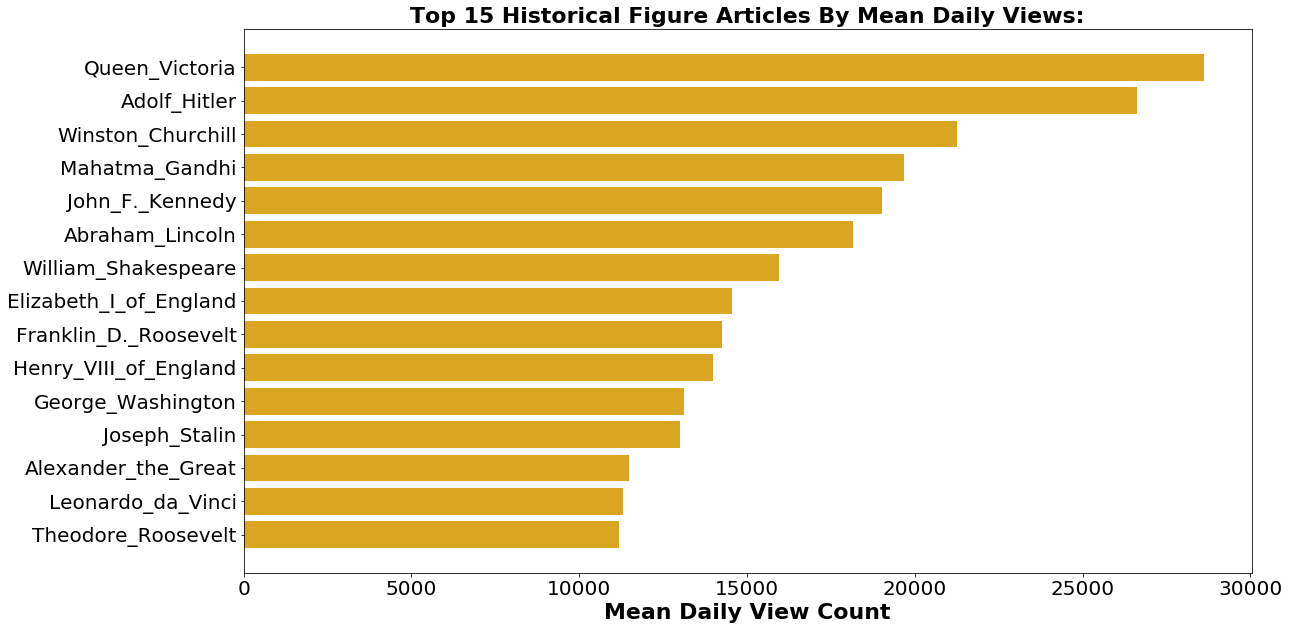

In [3]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

top_means = people.sort_values(by=['Mean_Daily_Views'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_means.index.values, top_means['Mean_Daily_Views'], color='goldenrod')
plt.title('Top 15 Historical Figure Articles By Mean Daily Views:', fontdict=font)
plt.xlabel('Mean Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

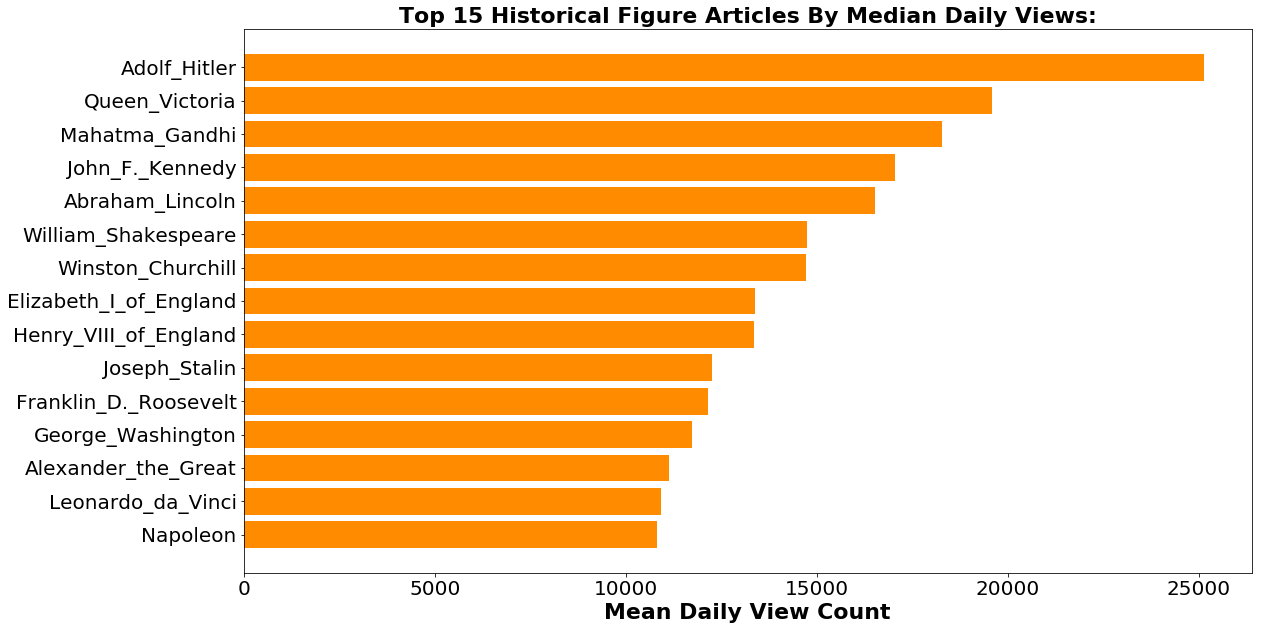

In [4]:
top_medians = people.sort_values(by=['Median'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_medians.index.values, top_medians['Median'], color='darkorange')
plt.title('Top 15 Historical Figure Articles By Median Daily Views:', fontdict=font)
plt.xlabel('Mean Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

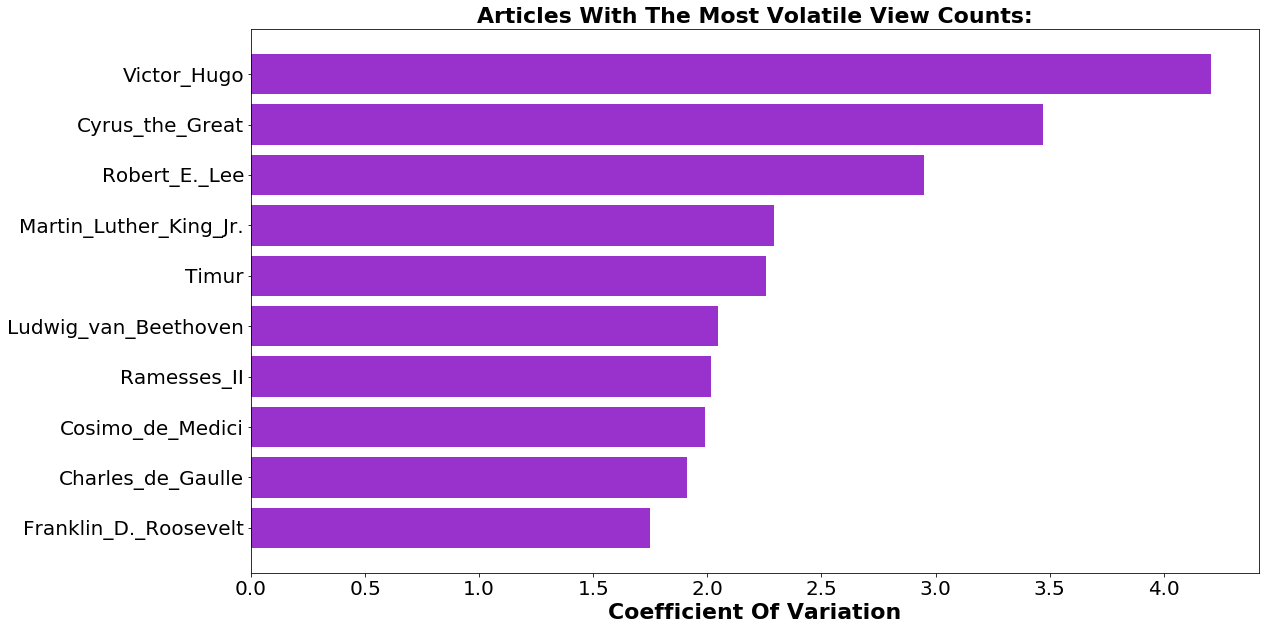

In [5]:

top_cvars = people.sort_values(by = ['Coef_Var'], ascending=False).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_cvars.index.values, top_cvars['Coef_Var'], color='darkorchid')
plt.title('Articles With The Most Volatile View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
# plt.savefig('PeopleVolatile.jpeg')
plt.show()

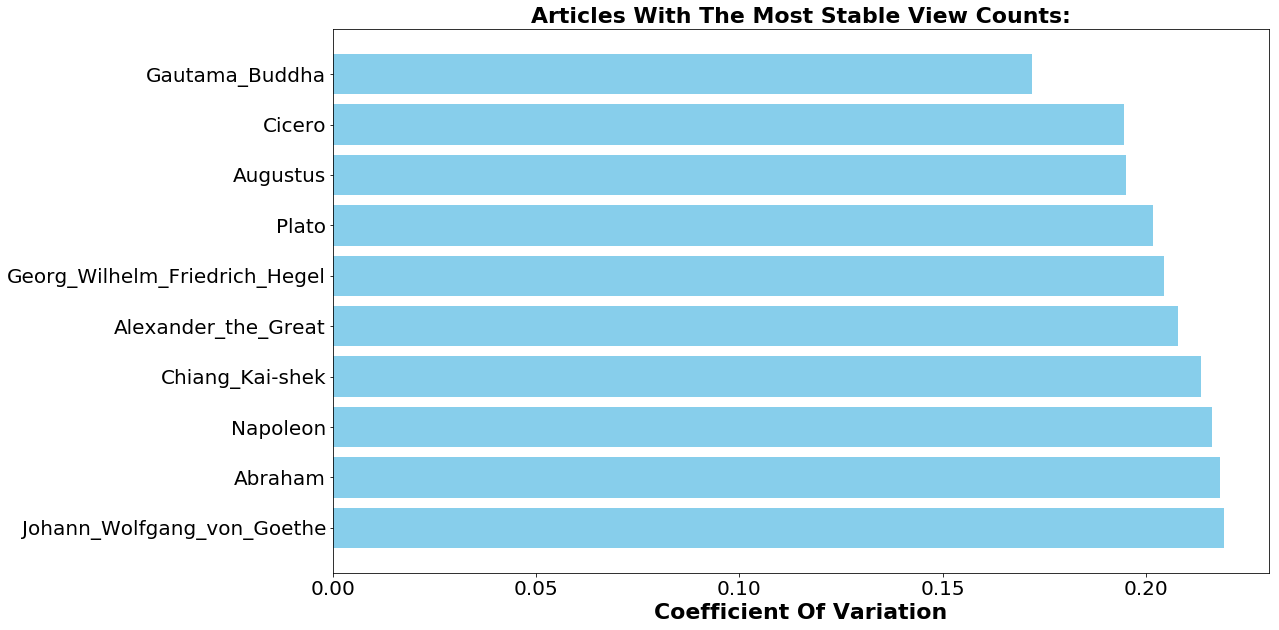

In [6]:
bottom_cvars = people.sort_values(by = ['Coef_Var'], ascending=True).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(bottom_cvars.index.values, bottom_cvars['Coef_Var'], color='skyblue')
plt.title('Articles With The Most Stable View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.25)
# plt.savefig('PeopleStable.jpeg')
plt.show()

In [7]:
def plot_daily(article):
    years = YearLocator()  
    months = MonthLocator()  
    monthsFmt = DateFormatter('%m')

    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}

    fig, ax = plt.subplots(figsize=(20,5))

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt)

    ax.xaxis.set_tick_params(labelsize=20, pad=20)
    ax.xaxis.set_tick_params(which='minor',labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)

    plt.plot(data['day'], data[article])
    plt.title(f'Daily View Count: {article}', fontdict=font)
    plt.ylabel('Daily View Count',fontdict=font)
    plt.gcf().subplots_adjust(bottom=0.15)
    #plt.savefig(f'{article}_Daily_Line.jpeg')
    plt.show()
    
    pass

In [8]:
def bar_top5(article):
    top_days = (data[['day', article]]).sort_values(ascending=False, by=article).head()
    top_days.loc[-1] = ['Mean', data[article].mean()]

    fig, ax = plt.subplots(figsize=(20,5))
    plt.bar(top_days['day'].astype(str).str.slice(0,10), top_days[article], color='firebrick')
    plt.title(f'Top 5 Days: {article}', fontdict=font)
    plt.ylabel('Daily Viewcount',fontdict=font)

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=15)
    
    #plt.savefig(f'{article}_Top5.jpeg')

    plt.show()

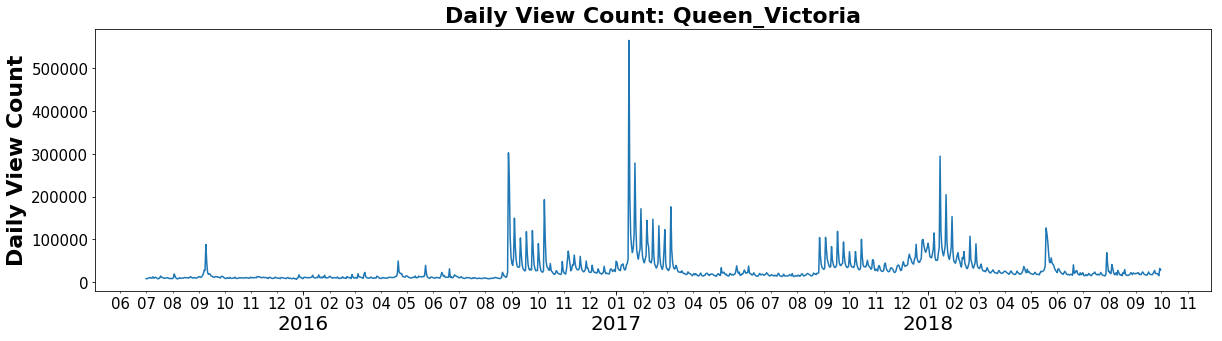

In [9]:
article = 'Queen_Victoria'

plot_daily(article)

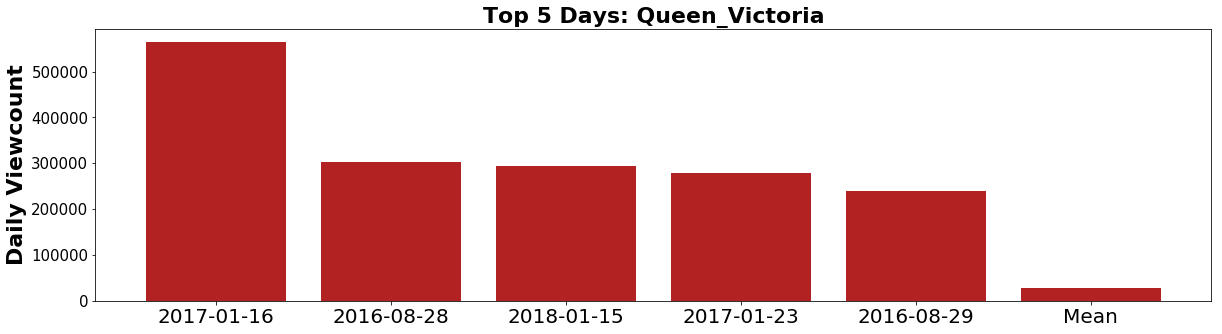

In [10]:
bar_top5(article)

### The British TV show 'Victoria' premiered in the U.K. on August 28, 2016, which accounts for why this day and the day after are in the top 5. It premiered in the U.S. on January 15, 2017, which accounts for why the day after is in the top 5. Season 2 began in the U.K. on August 27, 2017, and in the U.S. on January 14, 2018 (one day after in top 5). 

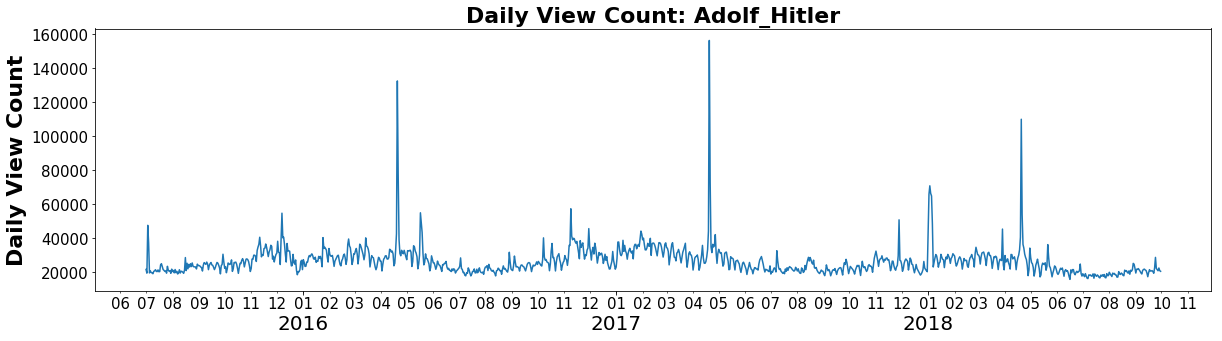

In [11]:
article = 'Adolf_Hitler'

plot_daily(article)

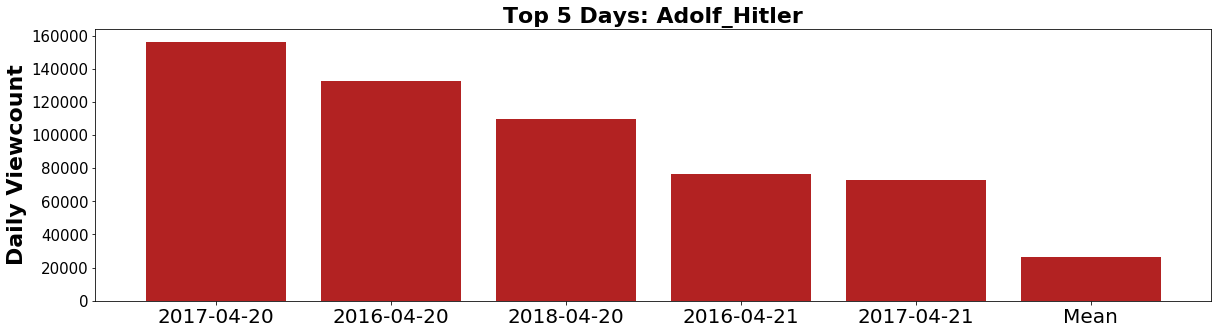

In [12]:
bar_top5(article)

### April 20 is Hitler's birthday, so this makes sense.

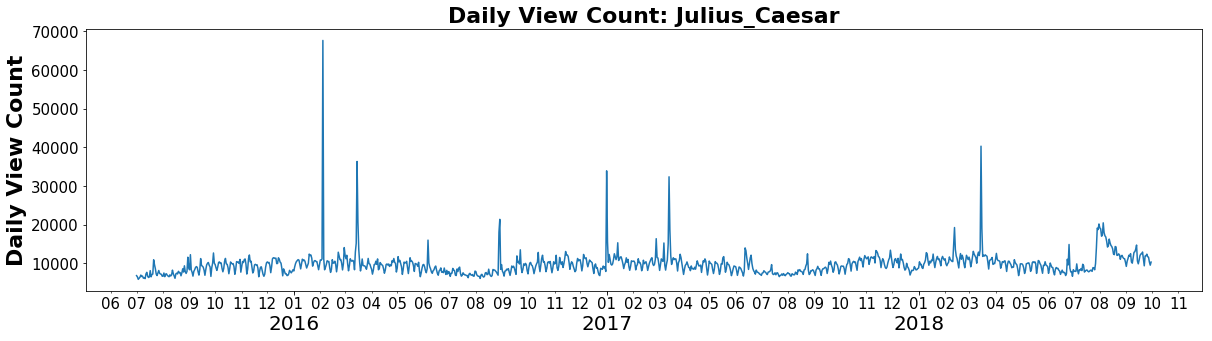

In [13]:
article = 'Julius_Caesar'

plot_daily(article)

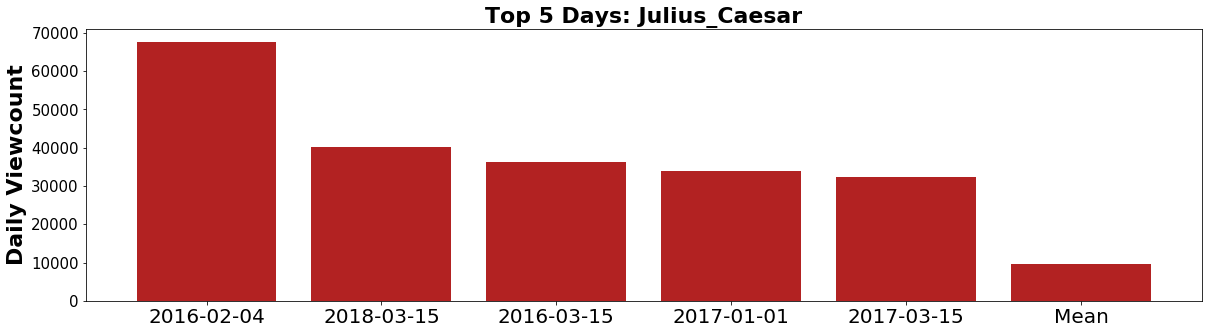

In [14]:
bar_top5(article)

### March 15 is the day when Caesar was assasinated, so it makes sense for these to be in the top 5. I'm not entirely sure why February 2, 2016 is such a big Caesar day, but it may have something to do with 2016 being a leap year, and February being the month which it affects, or with a screening of Shakespeare's Julius Caesar play in movie theaters live from the Globe theatre. January 1 is probably because this is the day when Caesar initated the Julian Calendar, in 46 BC. 

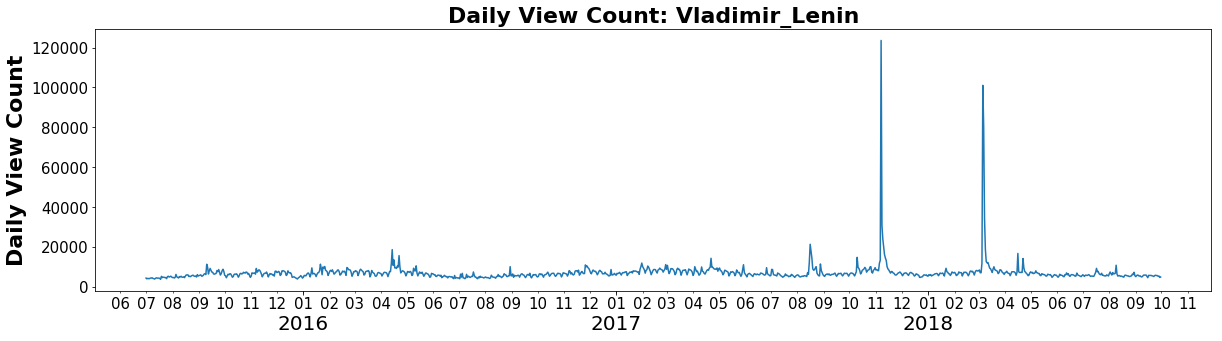

In [15]:
article = 'Vladimir_Lenin'

plot_daily(article)

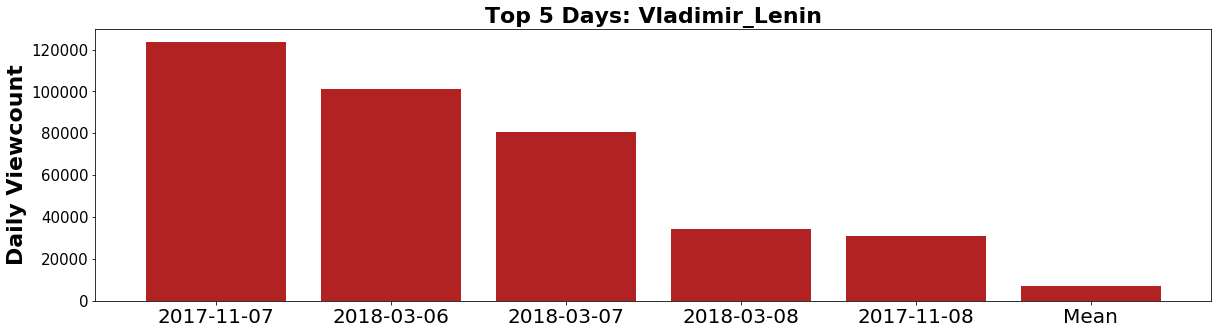

In [16]:
bar_top5(article)

### The 1917 Russian Revolution, in which Lenin played a key part, began on March 8, 1917, which explains dates around this being in the top 5. The Bolshevik Revolution then began on November 7, 1917, which explains why it and the day after are in the top 5.

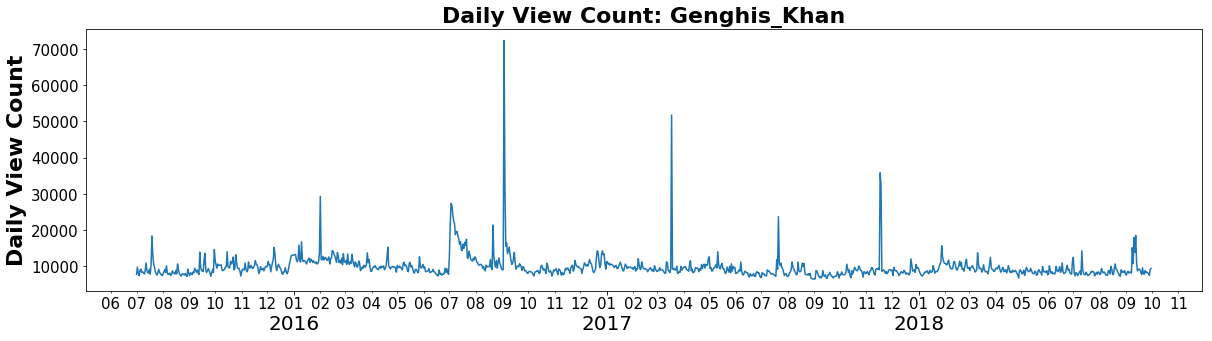

In [17]:
article = 'Genghis_Khan'

plot_daily(article)

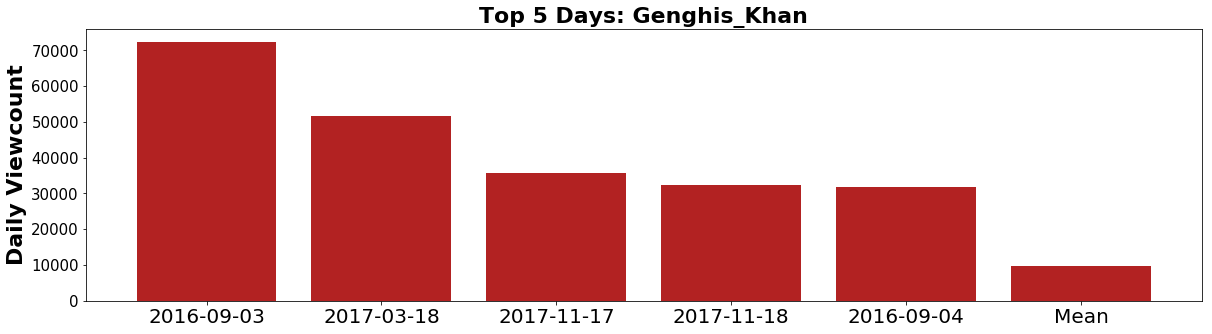

In [18]:
bar_top5(article)

### September 3, 2016 is when a series of sculptures about Genghis Khan's life were placed in a central square in the city of Ordos, in Inner Mongolia, China. This is why it and the day after are in the top 5. Genghis Khan Day, a public holiday in Mongolia which celebrates the symbolic birthday of Genghis Khan, falls on the 1st day of the 1st winter month according to Mongolian reckoning, which occurs in November. This explains the November dates in the top 5. I'm not sure why March 18, 2017 is there, but it could be because Soldiers' Day, another Mongolian public holiday, falls on that date. 

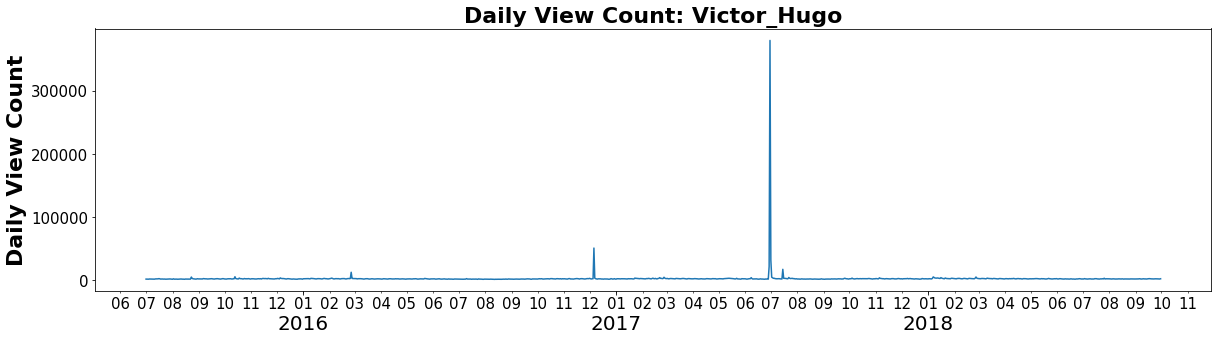

In [19]:
article = 'Victor_Hugo'

plot_daily(article)

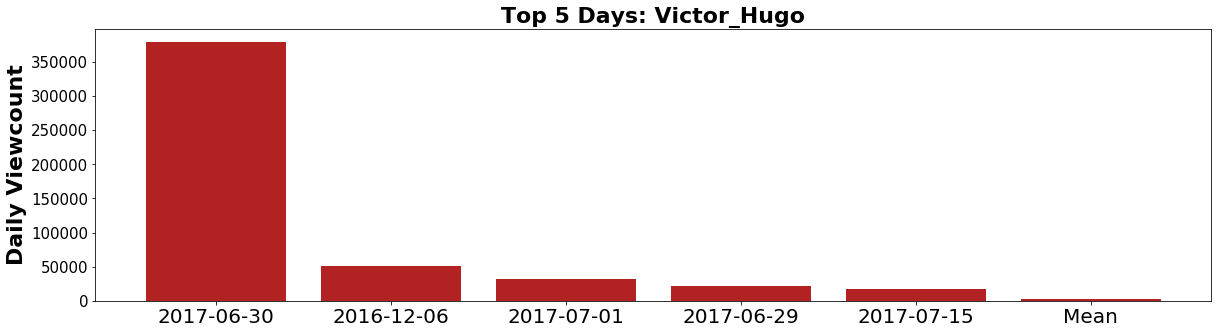

In [20]:
bar_top5(article)

### Google featured Hugo in its 'Doodle' on June 30, 2017, celebrating the 155th anniversary of the publication of the final chapter of Les Miserables.

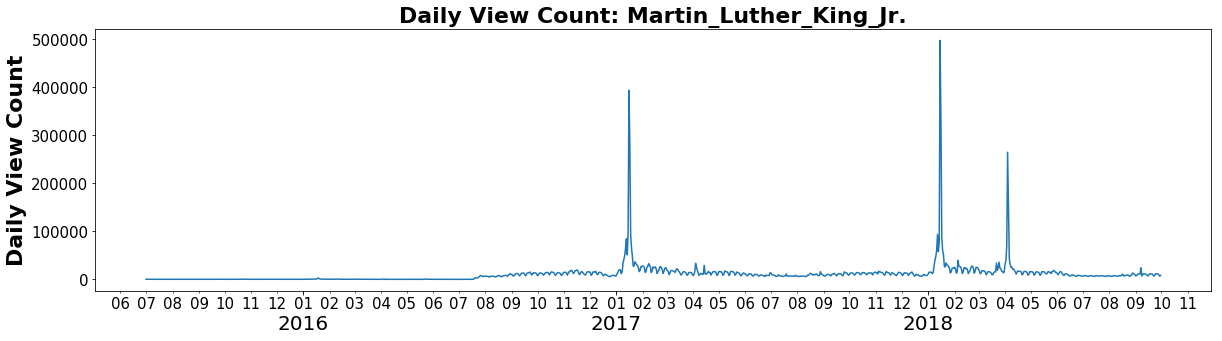

In [21]:
article = 'Martin_Luther_King_Jr.'

plot_daily(article)

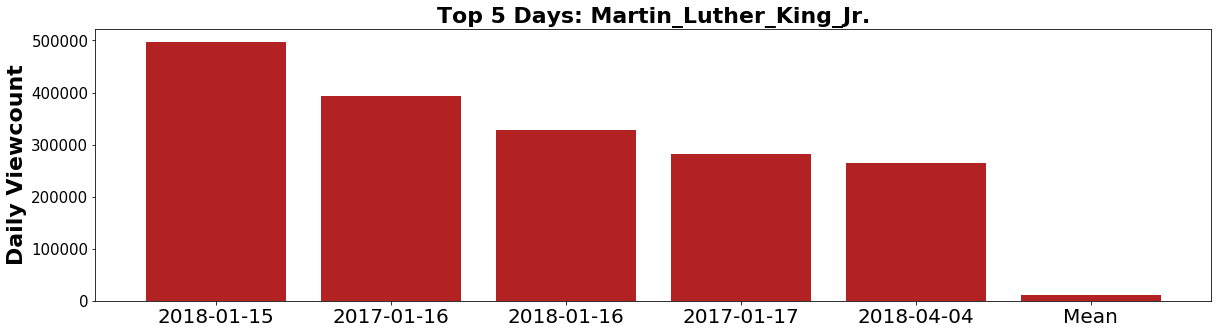

In [22]:
bar_top5(article)

### MLK day was on January 16th in 2017 and January 15th in 2018. 

In [23]:
data_smooth = data.copy()

for column in data_smooth.columns[1:]:
    sd = data_smooth[column].std()
    avg = data_smooth[column].mean()
    
    mask = data_smooth[column] > (avg + (sd*2))
    
    data_smooth.loc[mask, column] = (avg + (sd*2))

In [24]:
from sklearn.preprocessing import StandardScaler
data_scale = data_smooth.drop(columns = ['day'])

scaler = StandardScaler()
scaler.fit(data_scale)
data_scale = pd.DataFrame(scaler.transform(data_scale), columns = [data_scale.columns])
data_scale = data_scale.T

display(data_scale.head())

,0,1,2,3,4,5,6,7,8,9,...,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187
Adolf_Hitler,-0.762765,-1.135884,3.017679,1.931162,-1.114715,-0.905094,-1.078229,-1.108691,-1.195603,-0.954487,...,-0.977377,-1.148447,-0.597029,0.455896,-0.661912,-0.784277,-0.893563,-0.615789,-0.889777,-0.947259
Winston_Churchill,-0.906560,-0.901158,-0.951741,-0.936727,-0.872114,-0.860188,-0.897721,-0.875973,-0.888460,-0.870991,...,-0.429011,-0.232715,-0.162279,-0.286735,-0.309325,-0.388391,-0.388110,-0.502534,-0.364748,-0.219666
Joseph_Stalin,-1.398786,-1.425587,-1.524374,-1.636561,-1.365753,-1.286599,-1.354223,-1.391307,-1.381647,-1.409382,...,-0.894567,-0.881478,-0.647132,-0.732830,-0.806375,-0.739686,-0.976838,-0.817906,-1.090895,-0.918562
Franklin_D._Roosevelt,-0.859046,-0.859754,-0.735104,-0.576104,-0.282539,-0.420291,-0.579114,-0.664280,-0.713326,-0.789993,...,-0.824697,-0.836028,-0.800793,-0.747852,-0.706597,-0.569376,-0.695620,-0.756351,-0.943858,-0.823811
Mao_Zedong,-1.162011,-1.215293,-1.448549,-1.520776,-1.244894,-1.241934,-1.301136,-1.270943,-1.263247,-1.517816,...,-0.818638,-1.325409,-0.974340,-0.676553,-0.703194,-0.802653,-0.955395,-0.913361,-0.877248,-0.863632


In [25]:
dst = data_scale.T
display(dst.head())

,Adolf_Hitler,Winston_Churchill,Joseph_Stalin,Franklin_D._Roosevelt,Mao_Zedong,Alexander_the_Great,Julius_Caesar,Augustus,Nero,Marcus_Aurelius,...,"Camillo_Benso,_Count_of_Cavour",Giuseppe_Garibaldi,Sun_Yat-sen,Chiang_Kai-shek,Qin_Shi_Huang,Cao_Cao,Richard_Wagner,Christopher_Columbus,Georg_Wilhelm_Friedrich_Hegel,John_A._Macdonald
0,-0.762765,-0.906560,-1.398786,-0.859046,-1.162011,-0.638642,-1.395675,-1.956074,3.095243,-1.317161,...,-1.110037,-1.549038,-1.209620,-1.848527,-1.631596,-0.430216,-0.710854,-0.348894,-1.532569,1.557959
1,-1.135884,-0.901158,-1.425587,-0.859754,-1.215293,-0.796468,-1.557977,-2.000483,3.095243,-1.343560,...,-1.219160,0.122685,-1.100767,-1.686376,-1.724024,-0.980761,-0.707541,-0.324108,-1.143751,-0.381920
2,3.017679,-0.951741,-1.524374,-0.735104,-1.448549,-0.193401,-1.889236,-2.266934,-0.809512,-1.220366,...,-1.353464,-1.136535,-1.748158,-2.162253,-2.286807,-0.708727,-0.822658,-0.534028,-1.859307,-1.106739
3,1.931162,-0.936727,-1.636561,-0.576104,-1.520776,-0.905887,-1.738198,-2.368749,-0.949944,-1.336716,...,-1.403828,0.209528,-1.616388,-1.843240,-1.680891,-0.844744,-0.747294,-0.313049,-2.270997,-0.990768
4,-1.114715,-0.872114,-1.365753,-0.282539,-1.244894,-0.377447,-1.600984,-1.991818,-0.982631,-1.262408,...,-1.445798,-0.724032,-1.501806,-1.555951,-1.824668,-0.864175,-0.798641,-0.334403,-1.787425,-0.996039


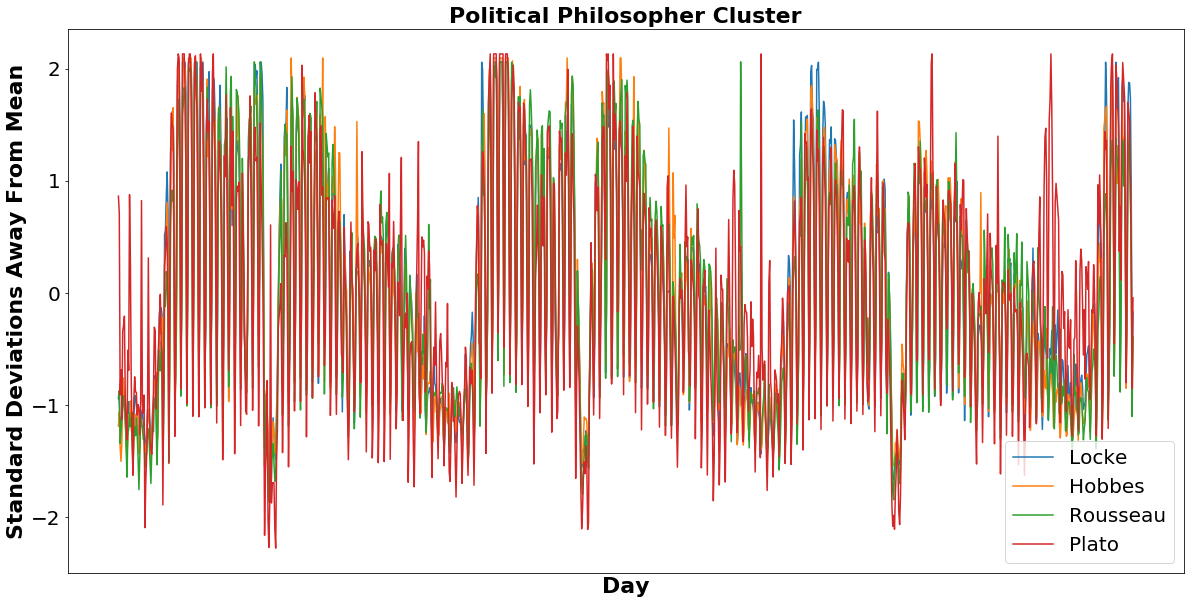

In [26]:

plt.figure(figsize=(20,10))
plt.xticks([],[])
plt.plot(dst['John_Locke'], label='Locke')
plt.plot( dst['Thomas_Hobbes'], label='Hobbes')
plt.plot( dst['Jean-Jacques_Rousseau'], label='Rousseau')
plt.plot( dst['Plato'], label='Plato')
plt.xlabel('Day', fontdict=font)
plt.ylabel('Standard Deviations Away From Mean', fontdict=font)
plt.legend(loc=4, prop={'size': 20})
plt.title('Political Philosopher Cluster', fontdict=font)
plt.tick_params(axis='y', labelsize=20)
# plt.savefig('PolPhilCluster.jpeg')
plt.show()

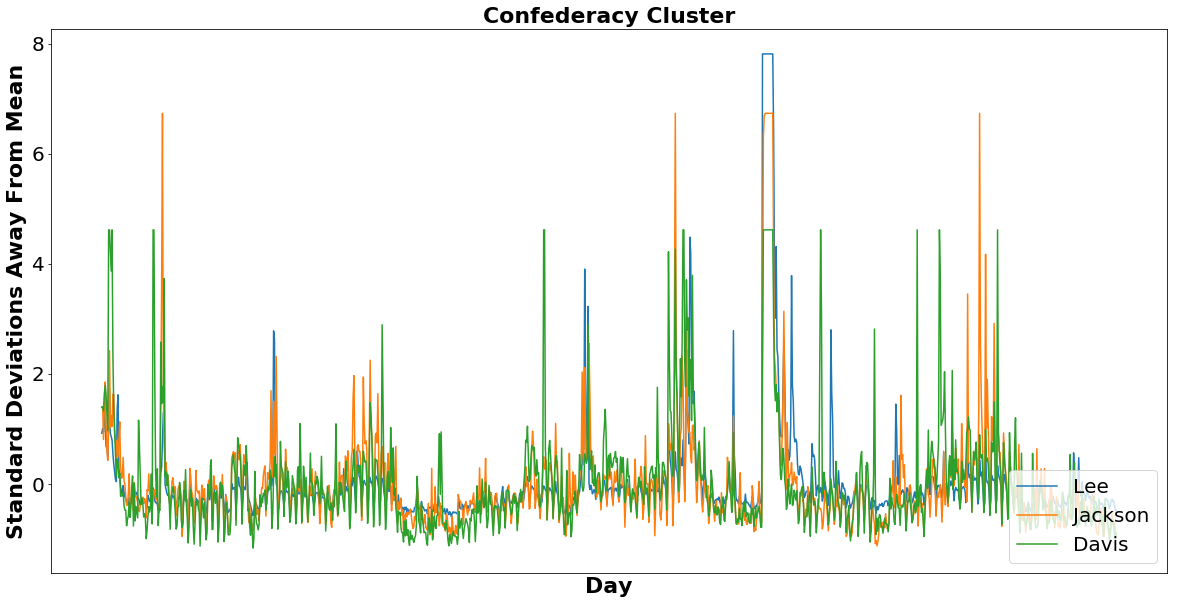

In [27]:
plt.figure(figsize=(20,10))
plt.xticks([], [])
plt.plot(dst['Robert_E._Lee'], label='Lee')
plt.plot(dst['Stonewall_Jackson'], label='Jackson')
plt.plot(dst['Jefferson_Davis'], label='Davis')
plt.xlabel('Day', fontdict=font)
plt.ylabel('Standard Deviations Away From Mean', fontdict=font)
plt.legend(loc=4, prop={'size': 20})
plt.title('Confederacy Cluster', fontdict=font)
plt.tick_params(axis='y', labelsize=20)
# plt.savefig('ConfederacyCluster.jpeg')
plt.show()

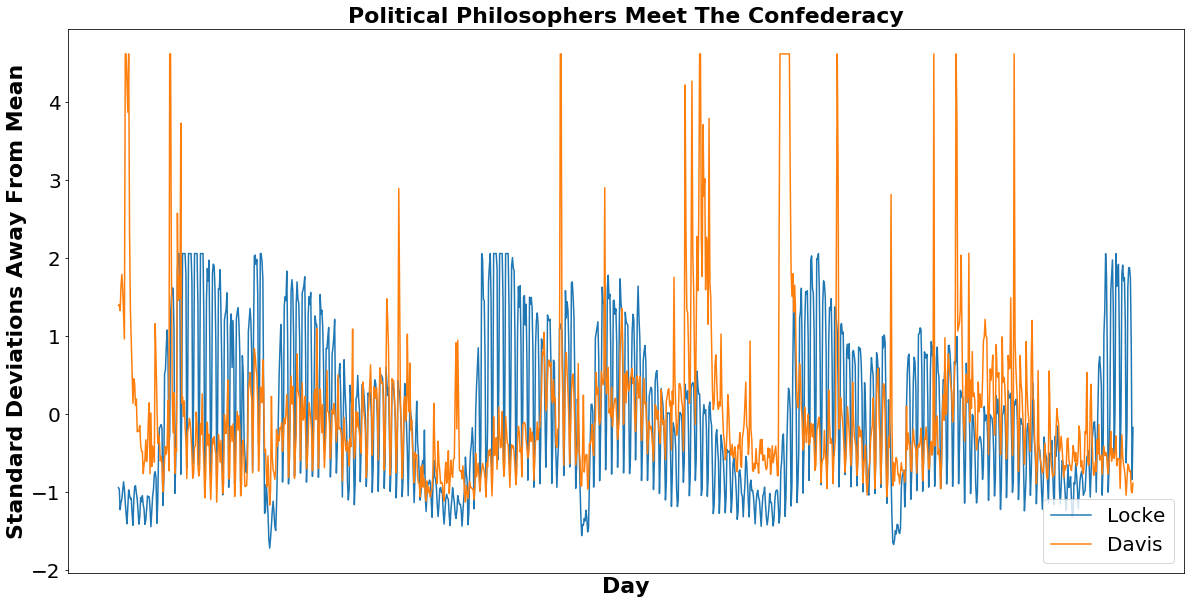

In [28]:
plt.figure(figsize=(20,10))
plt.xticks([], [])
plt.plot(dst['John_Locke'], label='Locke')
plt.plot(dst['Jefferson_Davis'], label='Davis')
plt.xlabel('Day', fontdict=font)
plt.ylabel('Standard Deviations Away From Mean', fontdict=font)
plt.legend(loc=4, prop={'size': 20})
plt.title('Political Philosophers Meet The Confederacy', fontdict=font)
plt.tick_params(axis='y', labelsize=20)
# plt.savefig('PhilConfederacy.jpeg')
plt.show()

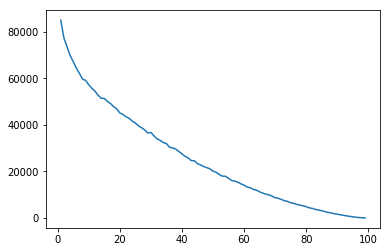

In [29]:
from sklearn.cluster import KMeans

n_clusters = np.arange(1,100)
inertias = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scale)
    
    inertias.append(kmeans.inertia_)
    
plt.plot(n_clusters, inertias)
plt.show()

### No clear 'elbow' here, so used a trial and error method to see which would create the most meaningful clusters. Settled on 60. 

In [30]:
from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=60, n_init=20)
# kmeans.fit(data_scale)

from sklearn.externals import joblib
kmeans = joblib.load('scale_cluster_smooth60.pkl')

data_scale['cluster'] = kmeans.predict(data_scale)

data_scale_ri = data_scale.reset_index()

display(data_scale.head())

,0,1,2,3,4,5,6,7,8,9,...,1179,1180,1181,1182,1183,1184,1185,1186,1187,cluster
Adolf_Hitler,-0.762765,-1.135884,3.017679,1.931162,-1.114715,-0.905094,-1.078229,-1.108691,-1.195603,-0.954487,...,-1.148447,-0.597029,0.455896,-0.661912,-0.784277,-0.893563,-0.615789,-0.889777,-0.947259,0
Winston_Churchill,-0.906560,-0.901158,-0.951741,-0.936727,-0.872114,-0.860188,-0.897721,-0.875973,-0.888460,-0.870991,...,-0.232715,-0.162279,-0.286735,-0.309325,-0.388391,-0.388110,-0.502534,-0.364748,-0.219666,20
Joseph_Stalin,-1.398786,-1.425587,-1.524374,-1.636561,-1.365753,-1.286599,-1.354223,-1.391307,-1.381647,-1.409382,...,-0.881478,-0.647132,-0.732830,-0.806375,-0.739686,-0.976838,-0.817906,-1.090895,-0.918562,1
Franklin_D._Roosevelt,-0.859046,-0.859754,-0.735104,-0.576104,-0.282539,-0.420291,-0.579114,-0.664280,-0.713326,-0.789993,...,-0.836028,-0.800793,-0.747852,-0.706597,-0.569376,-0.695620,-0.756351,-0.943858,-0.823811,34
Mao_Zedong,-1.162011,-1.215293,-1.448549,-1.520776,-1.244894,-1.241934,-1.301136,-1.270943,-1.263247,-1.517816,...,-1.325409,-0.974340,-0.676553,-0.703194,-0.802653,-0.955395,-0.913361,-0.877248,-0.863632,1


In [31]:
# from sklearn.externals import joblib
# joblib.dump(kmeans, 'scale_cluster_smooth70.pkl') 

In [32]:
people = people.reset_index()

people['cluster'] = data_scale_ri['cluster']

people = people.set_index('index')

people = people.sort_values(by=['Mean_Daily_Views'], ascending=False)

people['Highest_Daily_Views'] = data.drop(columns = ['day']).max()

for c in range(0,60):
    if(len(people[people['cluster']==c]) > 1):
        display(people[people['cluster']==c])

,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Joseph_Stalin,13014.724747,4825.332460,0.370759,12271.0,1,98720
Benito_Mussolini,7057.237374,2116.892992,0.299961,6537.0,1,32856
Mao_Zedong,6737.239057,2396.484941,0.355707,6327.0,1,39698
Chiang_Kai-shek,2921.049663,623.548133,0.213467,2841.0,1,7559
Sun_Yat-sen,1675.234007,520.846600,0.310910,1591.5,1,10401


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Robert_E._Lee,6350.528620,18720.586719,2.947878,4111.5,2,363923
Jefferson_Davis,3219.602694,2785.686784,0.865227,2709.5,2,45346
Stonewall_Jackson,2280.697811,2825.288745,1.238783,1948.5,2,63954


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Aristotle,6430.542929,1568.673251,0.243941,6224.0,4,19579
Plato,5448.327441,1099.267653,0.201762,5367.0,4,13221
John_Locke,3969.784512,1600.813174,0.403249,3665.5,4,8322
Niccolò_Machiavelli,3892.913300,1565.778623,0.402213,3813.0,4,48207
Voltaire,3664.455387,1773.554443,0.483989,3468.0,4,50432
Jean-Jacques_Rousseau,3021.364478,1008.310141,0.333727,2891.0,4,10298
Thomas_Hobbes,2199.106061,922.859747,0.419652,2013.5,4,9460
Pericles,1177.095960,419.306180,0.356221,1106.0,4,4592


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Cosimo_de_Medici,1873.598485,3730.743750,1.991218,1268.0,5,45577
Lorenzo_de_Medici,1336.955387,1176.319704,0.879850,1118.0,5,14806


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Queen_Victoria,28605.957071,32239.810081,1.127031,19596.0,6,564612
"Arthur_Wellesley,_1st_Duke_of_Wellington",1921.914141,573.805709,0.298559,1806.0,6,8091


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Abraham_Lincoln,18159.749158,6721.720620,0.370144,16526.0,7,88847
George_Washington,13125.750000,6764.144169,0.515334,11731.5,7,102054
Thomas_Jefferson,9285.807239,3586.018353,0.386183,8650.5,7,54430
Woodrow_Wilson,5525.931818,3028.395746,0.548033,4875.5,7,40269


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Genghis_Khan,9751.865320,3351.278943,0.343655,9087.0,8,72343
Kublai_Khan,3973.731481,4240.339919,1.067093,2908.0,8,53838


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Karl_Marx,8131.549663,3181.490186,0.391253,7855.0,11,75570
Otto_von_Bismarck,3295.327441,938.835261,0.284899,3175.5,11,17666
Qin_Shi_Huang,2244.859428,593.185307,0.264242,2205.0,11,8165
Georg_Wilhelm_Friedrich_Hegel,1604.888889,327.990979,0.204370,1579.0,11,3728
Giuseppe_Garibaldi,1234.361953,293.922487,0.238117,1193.5,11,3981


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Wolfgang_Amadeus_Mozart,7644.491582,3182.116649,0.416263,7361.5,12,87628
Frédéric_Chopin,3009.470539,1140.697509,0.379036,2897.5,12,31079
Franz_Schubert,1541.863636,429.359486,0.278468,1491.5,12,5478


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Julius_Caesar,9699.308923,3081.656588,0.317719,9442.0,14,67611
Augustus,5275.806397,1029.502422,0.195137,5223.5,14,13262


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Leonardo_da_Vinci,11306.409091,3773.122591,0.333715,10922.0,15,93715
Gautama_Buddha,7972.001684,1370.831846,0.171956,7869.0,15,30951
Michelangelo,5213.380471,1316.465504,0.252517,5094.5,15,26356
Johann_Sebastian_Bach,3818.584175,1053.795229,0.275965,3723.0,15,14287
Claude_Monet,2893.102694,942.931530,0.325924,2804.5,15,19830
Cicero,2520.412458,490.629154,0.194662,2496.5,15,6996
Maximilien_Robespierre,2307.989057,906.040639,0.392567,2207.0,15,16865
Johann_Wolfgang_von_Goethe,2174.870370,477.013959,0.219330,2128.0,15,10777
John_Stuart_Mill,1783.119529,485.253127,0.272137,1714.0,15,4254


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
John_F._Kennedy,19015.848485,8682.100771,0.456572,17051.0,34,115985
Franklin_D._Roosevelt,14256.208754,24909.968644,1.747307,12163.0,34,848856
Theodore_Roosevelt,11173.505051,7212.459811,0.645497,9697.5,34,135187
Andrew_Jackson,7733.452862,11108.551457,1.436428,5862.5,34,226057


In [33]:
peopleclust = pd.DataFrame()

for c in range(0,60):
    if(len(people[people['cluster']==c]) > 1):
        peopleclust = peopleclust.append(people[people['cluster']==c])

peopleclust['cluster'] = peopleclust['cluster'].replace(34,3)
peopleclust['cluster'] = peopleclust['cluster'].replace(15,9)
peopleclust['cluster'] = peopleclust['cluster'].replace(14,10)

peopleclust = peopleclust.sort_values(ascending=True, by='cluster')

peopleclust = peopleclust.reset_index()

peopleclust['Position'] = peopleclust.index.values

color_list = ['nothing','green','blue', 'black', 'orange', 'aqua', 'brown', 'purple', 'turquoise', 'red', 'gray', 'olive', 'navy', 'pink', 'maroon']

peopleclust['Color'] = 0

for i in peopleclust.index.values:
    peopleclust['Color'].loc[i] = color_list[peopleclust['cluster'].loc[i]]

peopleclust = peopleclust.rename(columns = {'index':'Name'})
display(peopleclust.head())

,Name,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views,Position,Color
0,Joseph_Stalin,13014.724747,4825.332460,0.370759,12271.0,1,98720,0,green
1,Benito_Mussolini,7057.237374,2116.892992,0.299961,6537.0,1,32856,1,green
2,Mao_Zedong,6737.239057,2396.484941,0.355707,6327.0,1,39698,2,green
3,Chiang_Kai-shek,2921.049663,623.548133,0.213467,2841.0,1,7559,3,green
4,Sun_Yat-sen,1675.234007,520.846600,0.310910,1591.5,1,10401,4,green


In [34]:
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.plotting import figure, show, output_notebook
from bokeh.resources import CDN
from bokeh.embed import file_html

output_notebook()

source = bpl.ColumnDataSource.from_df(peopleclust)

hover = bmo.HoverTool(
    tooltips=[
        ('Name', '@Name'),
        ("Mean Daily Views", '@Mean_Daily_Views{int}'),
        ("Median Daily Views", '@Median{int}'),
        ("Standard Deviation", '@Standard_Deviation{int}'),
        ("Highest Daily Views", '@Highest_Daily_Views{int}')
    ]
)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,tap,save,box_select,"

p = figure(tools=[TOOLS,hover],plot_width=800, plot_height=1200)

p.scatter('cluster', 'Position', radius = 0.13, fill_color = 'Color', source=source)

# html = file_html(p, CDN, "PeopleCluster")

# Html_file= open("PeopleClustering.html","w")
# Html_file.write(html)
# Html_file.close()
show(p)

Loading BokehJS ...